# Fake News Classifier

In [ ]:
from __future__ import print_function
import numpy as np
import pandas as pd
import string
from sklearn.model_selection import train_test_split

# we need to separate a portion of the data for train and test
fake=pd.read_csv('Fake.csv', sep=',',header=0)
true=pd.read_csv('True.csv', sep=',',header=0)

# print(fake_coded_headlines[0])

## Create Data Labels and Join Datasets

In [ ]:
# Code the true/fake data
zeros = np.zeros((fake.shape[0], 1))
fake_coded_headlines = np.append(fake.values[:,0].reshape(fake.shape[0], 1), zeros, 1)

ones = np.ones((true.shape[0], 1))
true_coded_headlines = np.append(true.values[:,0].reshape(true.shape[0], 1), ones, 1)

# Join into one dataset
joined = np.append(fake_coded_headlines, true_coded_headlines, axis=0)

# split data into titles and labels
X = joined[:,0]
y = joined[:,1]
y = np.asarray(y)
y=y.astype('int')

print(X)

[' Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing'
 ' Drunk Bragging Trump Staffer Started Russian Collusion Investigation'
 ' Sheriff David Clarke Becomes An Internet Joke For Threatening To Poke People ‘In The Eye’'
 ... 'Minsk cultural hub becomes haven from authorities'
 'Vatican upbeat on possibility of Pope Francis visiting Russia'
 'Indonesia to buy $1.14 billion worth of Russian jets']


## Generate character frequency of titles

In [ ]:
from collections import Counter

allheadlines = ''.join(X.copy())
allchars = Counter(allheadlines)
vocab = dict(allchars).keys()
print(vocab)

dict_keys([' ', 'D', 'o', 'n', 'a', 'l', 'd', 'T', 'r', 'u', 'm', 'p', 'S', 'e', 's', 'O', 't', 'E', 'b', 'i', 'g', 'N', 'w', 'Y', '’', 'v', 'M', ';', 'h', 'k', 'B', 'f', 'R', 'C', 'I', 'c', 'A', 'J', 'F', 'P', '‘', 'y', 'H', 'W', '(', 'G', ')', 'z', ',', 'L', 'U', ':', '-', '*', 'K', '—', '2', '0', '1', '8', '–', 'x', '.', 'V', 'X', 'Z', '5', '?', '7', '4', '3', 'j', 'Q', '6', '$', '!', '[', ']', '/', 'q', '+', 'í', '9', '%', '#', '“', '”', '\r', '\n', '&', '…', 'é', '™', '@', '\u202a', '\u200e', '\u202c', '\xa0', '_', '\u200b', '′', "'", '{', 'ñ', '}', '″', '€', '£', 'É', '¡', 'ë', '\ufeff', '\xad', '=', 'Ž', 'ž', 'ć', 'à', '"', 'á', '¿'])


In [ ]:


cfreqs = [{}] * len(X)

for x in range(len(X)):
  cfreqs[x] = dict(Counter(X[x]))

print(len(X))
print(cfreqs[0])



def vectorizeByChar(str):
    output_vector = []
    for c in vocab:
        output_vector.append(str.count(c))
    return output_vector

vectorizedXByChar = X.copy()
for i in range(len(X)):
    vectorizedXByChar[i] = vectorizeByChar(X[i])

vectorizedXByChar = np.array(vectorizedXByChar[:].tolist())
print(vectorizedXByChar)


44898
{' ': 12, 'D': 2, 'o': 1, 'n': 4, 'a': 5, 'l': 1, 'd': 2, 'T': 2, 'r': 5, 'u': 3, 'm': 2, 'p': 1, 'S': 1, 'e': 6, 's': 9, 'O': 1, 't': 2, 'E': 2, 'b': 2, 'i': 5, 'g': 3, 'N': 1, 'w': 1, 'Y': 1, '’': 1, 'v': 1, 'M': 1, ';': 1, 'h': 1}
[[12  2  1 ...  0  0  0]
 [ 8  1  3 ...  0  0  0]
 [15  1  6 ...  0  0  0]
 ...
 [ 6  0  3 ...  0  0  0]
 [ 8  0  4 ...  0  0  0]
 [ 8  0  5 ...  0  0  0]]


In [ ]:

#using random state for reproducible results
X_train, X_test, y_train, y_test = train_test_split(vectorizedXByChar, y, test_size=0.3, random_state=200)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

print(X_train.shape)

(31428, 121)
(13470, 121)
(31428,)
(13470,)
(31428, 121)


In [ ]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9727542687453601

In [ ]:
from sklearn import svm

svmX = X_train
svmY = y_train
svmClassifier = svm.SVC()
svmClassifier.fit(svmX, svmY)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svmClassifier.score(X_test, y_test)

0.9916852264291017

In [ ]:
vectorizedXByChar[4577]

array([10,  2,  3,  4,  4,  3,  3,  1,  3,  1,  1,  1,  0,  5,  3,  0,  0,
        0,  0,  3,  2,  0,  0,  0,  0,  1,  1,  0,  0,  1,  1,  0,  1,  0,
        0,  3,  1,  0,  0,  1,  0,  2,  0,  0,  0,  0,  0,  0,  0,  0,  2,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0])

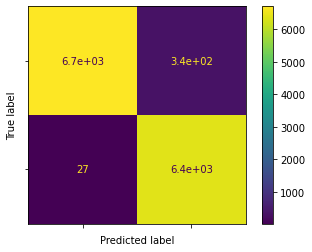

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm, []).plot()

## Generate Bag Of Words and Clean Titles

In [ ]:
import re
from string import ascii_lowercase
import heapq
from nltk.corpus import stopwords
# Create wordbank for BOW

cleaned = X.copy()

# clean and tokenize each title
for i in range(len(cleaned)): 
    cleaned[i] = X[i].lower() 
    cleaned[i] = re.sub(r'\W', ' ', cleaned[i]) 
    cleaned[i] = re.sub(r'\s+', ' ', cleaned[i])
    cleaned[i] = cleaned[i].split()
        
# create bag of words corpus filtering out stopwords
myCorpus = {}
stopwords = set(stopwords.words('english'))
for title in cleaned: 
    for word in title:
        if word not in stopwords:
            if word not in myCorpus.keys(): 
                myCorpus[word] = 1
            else: 
                myCorpus[word] += 1 
          

# consider removing single letter words
for c in ascii_lowercase:
    myCorpus.pop(c, None)


# remove less common words
vocab = heapq.nlargest(1000, myCorpus, key=myCorpus.get)

print(vocab)

['trump', 'video', 'says', 'obama', 'hillary', 'house', 'watch', 'clinton', 'new', 'white', 'president', 'russia', 'bill', 'state', 'republican', 'north', 'election', 'news', 'court', 'korea', 'senate', 'black', 'media', 'donald', 'breaking', 'vote', 'calls', 'china', 'anti', 'gop', 'police', 'tax', 'republicans', 'campaign', 'one', 'america', 'may', 'muslim', 'deal', 'iran', 'gets', 'russian', 'democrats', 'us', 'tweets', 'government', 'party', 'fbi', 'eu', 'people', 'cnn', 'back', 'attack', 'syria', 'former', 'war', 'first', 'law', 'leader', 'top', 'senator', 'talks', 'speech', 'twitter', 'plan', 'chief', 'tells', 'congress', 'security', 'democrat', 'minister', 'man', 'fox', 'make', 'would', 'ban', 'right', 'pm', 'gun', 'racist', 'american', 'south', 'could', 'judge', 'get', 'sanders', 'governor', 'women', 'two', 'brexit', 'official', 'makes', 'liberal', 'military', 'million', 'say', 'probe', 'fake', 'cruz', 'putin', 'year', 'americans', 'report', 'shows', 'factbox', 'foreign', 'nucl

## Vectorize Data

In [ ]:
# vectorize the titles
def vectorize(title):
    output_vector = []
    for word in vocab:
        output_vector.append(title.count(word))
    return output_vector

vectorizedX = cleaned
for i in range(len(cleaned)):
    vectorizedX[i] = vectorize(cleaned[i])

X = np.array(vectorizedX[:].tolist())
print(X)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Create Train and Test Sets

In [ ]:

#using random state for reproducible results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=200)

print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

print(X_train.shape)

(31428, 1000)
(13470, 1000)
(31428,)
(13470,)
(31428, 1000)


## Create a Bernouilli Naive Bayes and Score It

In [ ]:
from sklearn.naive_bayes import BernoulliNB

clf = BernoulliNB()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9089086859688196

## Confusion Matrix

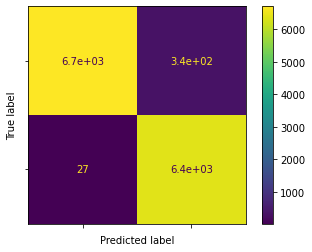

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm, []).plot()

In [ ]:
from sklearn import svm

svmX = X_train
svmY = y_train
svmClassifier = svm.SVC()
svmClassifier.fit(svmX, svmY)

In [ ]:
svmClassifier.score(X_test, y_test)

## Adding In Sentiment Analysis
### Using vaderSentiment and textblob Packages

In [ ]:
pip install vaderSentiment

In [ ]:
pip install -U textblob

In [ ]:
from __future__ import print_function
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import pandas as pd
from textblob import TextBlob

analyzer = SentimentIntensityAnalyzer()

sentiment_subjectivity = np.empty([X.shape[0],5])

In [ ]:
for i in range(len(sentiment_subjectivity)):
    vs = analyzer.polarity_scores(X[i])
    keys, values = zip(*vs.items())
    sentiment_subjectivity[i][0] = values[0]
    sentiment_subjectivity[i][1] = values[1]
    sentiment_subjectivity[i][2] = values[2]
    sentiment_subjectivity[i][3] = values[3]
    sentiment_subjectivity[i][4]=TextBlob(X[i]).sentiment.subjectivity

In [ ]:
X_train_sent, X_test_sent, y_train_sent, y_test_sent = train_test_split(sentiment_subjectivity, y, test_size=0.3, random_state=200)

In [ ]:
from sklearn.naive_bayes import BernoulliNB

senti = BernoulliNB()
senti.fit(X_train_sent, y_train_sent)
senti.score(X_test_sent, y_test_sent)

In [ ]:
from sklearn import svm

svmClassifier_senti = svm.SVC()
svmClassifier_senti.fit(X_train_sent, y_train_sent)
svmClassifier_senti.score(X_test_sent, y_test_sent)